In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import matplotlib.font_manager as fm
plt.rc('font', family=fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name())
import warnings
warnings.filterwarnings(action='ignore')

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\JangSeongHyun\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\JangSeongHyun\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
customer = pd.read_csv('./data/LPOINT_BIG_COMP_01_DEMO.csv')            # 고객정보
product_use = pd.read_csv('./data/LPOINT_BIG_COMP_02_PDDE.csv')         # 유통사 상품 구매내역
serv_use = pd.read_csv('./data/LPOINT_BIG_COMP_03_COP_U.csv')           # 제휴사 서비스 이용내역
product = pd.read_csv('./data/LPOINT_BIG_COMP_04_PD_CLAC.csv')          # 유통사 상품 카테고리 마스터
brand = pd.read_csv('./data/LPOINT_BIG_COMP_05_BR.csv')                 # 유통사/제휴사 점포 마스터
lpay = pd.read_csv('./data/LPOINT_BIG_COMP_06_LPAY.csv')                # 엘페이 결제 내역

In [3]:
customer.columns = ['고객번호', '성별', '연령대', '거주지대분류코드']
product_use.columns = ['고객번호', '영수증번호', '채널구분', '제휴사', '점포코드', '상품코드', '구매일자', '구매시간', '구매금액', '구매수량']
serv_use.columns = ['고객번호', '영수증번호', '제휴사', '점포코드', '채널구분', '이용일자', '방문일자', '이용시간', '이용금액']
product.columns = ['상품코드', '소분류명', '중분류명', '대분류명']
brand.columns = ['점포코드', '제휴사', '점포대분류코드', '점포중분류코드']
lpay.columns = ['고객번호', '영수증번호', '제휴사', '채널구분', '이용일자', '이용시간', '이용금액']

In [8]:
customer.head()

,고객번호,성별,연령대,거주지대분류코드
0,M000034966,여성,40대,Z07
1,M000059535,여성,30대,Z12
2,M000136117,여성,30대,Z11
3,M000201112,여성,50대,Z17
4,M000225114,여성,40대,Z17


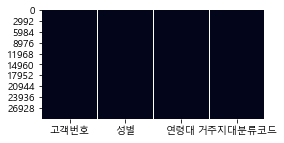

In [5]:
plt.figure(figsize=(4, 2)) 
sns.heatmap(customer.isnull(), cbar=False)
plt.show()

In [6]:
product_use.head()

,고객번호,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1


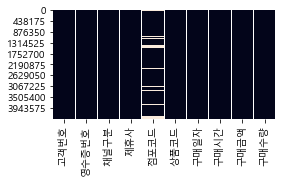

0.09779236253700868


In [61]:
plt.figure(figsize=(4, 2)) 
sns.heatmap(product_use.isnull(), cbar=False)
plt.show()
print(product_use.점포코드.isnull().sum()/product_use.shape[0])

In [7]:
serv_use.head()

,고객번호,영수증번호,제휴사,점포코드,채널구분,이용일자,방문일자,이용시간,이용금액
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500


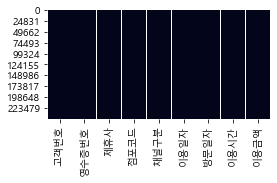

In [7]:
plt.figure(figsize=(4, 2)) 
sns.heatmap(serv_use.isnull(), cbar=False)
plt.show()

In [9]:
product.head()

,상품코드,소분류명,중분류명,대분류명
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구


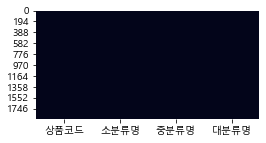

In [8]:
plt.figure(figsize=(4, 2)) 
sns.heatmap(product.isnull(), cbar=False)
plt.show()

In [46]:
brand.head()

,점포코드,제휴사,점포대분류코드,점포중분류코드
0,A010001,A01,Z17,Z17024
1,A010002,A01,Z17,Z17018
2,A010003,A01,Z17,Z17011
3,A010004,A01,Z16,Z16007
4,A010005,A01,Z17,Z17005


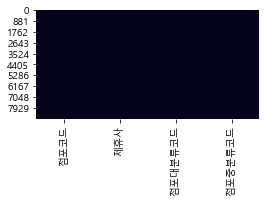

In [9]:
plt.figure(figsize=(4, 2)) 
sns.heatmap(brand.isnull(), cbar=False)
plt.show()

In [53]:
lpay.head()

,고객번호,영수증번호,제휴사,채널구분,이용일자,이용시간,이용금액
0,M629656521,210803210311226,A03,1,20210803,21,10900
1,M216016456,210803130167542,L01,2,20210803,13,6860
2,M205142844,210803140275112,A02,1,20210803,14,9000
3,M737010483,210803040637594,A06,2,20210803,4,36740
4,M707775545,210803140675502,A06,2,20210803,14,138500


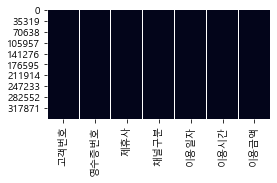

In [10]:
plt.figure(figsize=(4, 2)) 
sns.heatmap(lpay.isnull(), cbar=False)
plt.show()

In [4]:
product_use.제휴사.unique(), serv_use.제휴사.unique()

(array(['A01', 'A02', 'A03', 'A04', 'A05', 'A06'], dtype=object),
 array(['B01', 'D01', 'C01', 'D02', 'C02', 'E01'], dtype=object))

In [5]:
brand.제휴사.nunique(),brand.제휴사.unique() # A06 제휴사가 없음

(11,
 array(['A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01',
        'D02', 'E01'], dtype=object))

In [38]:
lpay.제휴사.nunique(), lpay.제휴사.unique() # l00, l01 제휴사가 있음 -- 엘포인트 제휴사같은 예외적인 것? 롯데 제휴사 인것으로 보임

(14,
 array(['A03', 'L01', 'A02', 'A06', 'A01', 'C01', 'D02', 'A04', 'L00',
        'D01', 'A05', 'C02', 'E01', 'B01'], dtype=object))

In [4]:
# fig, ax = plt.subplots(3,2, figsize=(32,16))
# sns.heatmap(customer.isnull(), cbar=False,ax=ax[0])
# ax[0].set_xticklabels(customer.columns, rotation='vertical')

# sns.heatmap(product_use.isnull(), cbar=False,ax=ax[1])
# sns.heatmap(serv_use.isnull(), cbar=False,ax=ax[2])
# sns.heatmap(product.isnull(), cbar=False,ax=ax[3])
# sns.heatmap(brand.isnull(), cbar=False,ax=ax[4])
# sns.heatmap(lpay.isnull(), cbar=False,ax=ax[5])
# plt.show()

#### ## product_use에서 점포코드만 결측치가 있는 것으로 보임.

---

### Product_use 와 Serv_use  확인

In [142]:
intersection_1 = list(set(product_use.고객번호.unique()) & set(serv_use.고객번호.unique()))
intersection_2 = list(set(product_use.영수증번호.unique()) & set(serv_use.영수증번호.unique()))
(len(intersection_1),len(product_use.고객번호.unique()),len(serv_use.고객번호.unique())),(len(intersection_2),len(product_use.영수증번호.unique()),len(serv_use.영수증번호.unique()))
# 겹치는 고객은 있지만 겹치는 영수증은 없다.
# 그렇다면 고객이 제휴사 서비스를 몇번 사용했는지만 사용할 수 있을 것으로 보인다.

((18930, 26917, 21769), (0, 1266589, 248304))

In [233]:
serv_use.이용금액.describe()
# 또는 고객별 제휴사 서비스 이용금액을 수치로 사용할 수도 있다.
# 우려되는 점은 최대, 최소의 격차가 크다는 것

count    2.483040e+05
mean     2.013066e+04
std      2.430121e+05
min      1.000000e+00
25%      5.000000e+03
50%      9.000000e+03
75%      1.580000e+04
max      7.009200e+07
Name: 이용금액, dtype: float64

In [261]:
serv_use[serv_use.고객번호 == serv_use[serv_use.이용금액 ==serv_use.이용금액.min()].iloc[0,0]]
# 한 고객에 대해 확인해보니 평균값보다 합계를 활용하는 것이 좋을 것으로 보임.

,고객번호,영수증번호,제휴사,점포코드,채널구분,이용일자,방문일자,이용시간,이용금액
7310,M932721973,21061114C022840110,C02,C020002,1,20210611,20210611,14,4500
7311,M932721973,21061116C025518564,C02,C020002,1,20210611,20210611,16,12000
7312,M932721973,21080817C025842720,C02,C020002,1,20210808,20210808,17,4200
7313,M932721973,21051517C025117275,C02,C020002,1,20210515,20210515,17,10000
131812,M932721973,21061115C025726587,C02,C020002,1,20210611,20210611,15,25000
131813,M932721973,21061115C022916363,C02,C020002,1,20210611,20210611,15,1
131814,M932721973,21061115C020634890,C02,C020002,1,20210611,20210611,15,3500
131815,M932721973,21080817C020635369,C02,C020002,1,20210808,20210808,17,3000
131816,M932721973,21080818C021518157,C02,C020002,1,20210808,20210808,18,12000
131817,M932721973,21100917D014610770,D01,D010578,1,20211009,20211009,17,12300


결론적으로 상품구매정보와 제휴사이용정보간의 관게는 없다. 그래서 merge를 하는 것은 고객아이디를 이용하여 수치적인 값만 사용할 수 있을 것?

In [143]:
# 채널구분이 2인 것은 점포가 null값인 경우이다!
product_use[product_use.채널구분==2].점포코드.isnull().sum(), product_use[product_use.채널구분==2].shape

(428501, (428501, 10))

---

### Product 와 Product_use 의 merge 가능성

In [109]:
product.상품코드.nunique(), product_use.상품코드.nunique()
# 상품코드는 정상

(1933, 1933)

### Customer 와 Product_use의 merge 가능성

In [222]:
customer.고객번호.nunique(),product_use.고객번호.nunique()
# 고객번호도 괜찮음

(29913, 26917)

---

엘페이를 사용하는 것은 포인트 사용이라 생각하면 된다. \
상품을 구매하거나 제휴사를 이용할 때 금액을 돈을 내거나 또는 엘페이를 사용할 수 있는 것\
결론적으로 현재 데이터를 구분하자면
1. 상품구매 2. 상품구매(엘페이) 3. 제휴사이용 4. 제휴사이용(엘페이)

개인별로 제휴사를 많이 사용하거나, 상품을 많이 구매하거나 하는 사람이 있을 것\
그리고 그 개인이 엘포인트를 사용하는지, 아니면 그냥 돈으로 하는지도 나뉠 것

일단 상품구매와 제휴사 이용을 같이 사용하는 것은 힘들 것으로 보인다...
##### serv_use와 product_use를 merge 한다면 차이나는 컬럼을 정리해둔 것
['고객번호', '영수증번호', '채널구분', '제휴사', '점포코드', '상품코드', '구매일자', '구매시간', '구매금액', '구매수량'] product_use\
-------------------------------------------------------------'이용일자', '방문일자', '이용시간', '이용금액'--------------serv_use

---

In [80]:
# 제휴사이용정보에서 이용일자와 방문일자가 다른 것이 있다. 이는 결제일자, 제휴사의 유형에 따라 특정 제휴사가 그런 것. 
# 전부 제휴사가 C01 임
serv_use[serv_use.이용일자!= serv_use.방문일자].제휴사.unique(), serv_use[serv_use.이용일자!= serv_use.방문일자].shape

(array(['C01'], dtype=object), (15572, 9))

In [78]:
# C01의 전부는 아니다
(serv_use.제휴사 == "C01").sum()

48323

In [111]:
pro_a = product_use.groupby('영수증번호')['상품코드'].nunique().reset_index()
pro_a.columns = ['영수증번호','구매상품종류']

In [150]:
pro_a.구매상품종류.unique()

array([ 1,  2,  3, 11,  4,  5,  6, 20,  9, 12,  8,  7, 14, 15, 10, 24, 13,
       17, 22, 23, 18, 19, 16, 21, 27, 25, 33, 29, 26, 28, 31, 39, 36, 30,
       37, 34, 40, 32, 42, 35, 50, 62, 44, 46, 41, 38, 45, 51, 43, 55, 56,
       49, 53, 75, 48, 47, 54, 52, 60], dtype=int64)

In [118]:
product_use[product_use.영수증번호=='A01000371544']

,고객번호,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량
522,M325661634,A01000371544,1,A01,A010011,PD1306,20210102,11,1980.0,1
523,M325661634,A01000371544,1,A01,A010011,PD0948,20210102,11,3780.0,1
524,M325661634,A01000371544,1,A01,A010011,PD0379,20210102,11,6500.0,1
525,M325661634,A01000371544,1,A01,A010011,PD1288,20210102,11,3500.0,1
526,M325661634,A01000371544,1,A01,A010011,PD1516,20210102,11,32300.0,1
527,M325661634,A01000371544,1,A01,A010011,PD0177,20210102,11,26000.0,1
528,M325661634,A01000371544,1,A01,A010011,PD1155,20210102,11,7960.0,2
529,M325661634,A01000371544,1,A01,A010011,PD1427,20210102,11,4500.0,1
530,M325661634,A01000371544,1,A01,A010011,PD1516,20210102,11,149280.0,1
531,M325661634,A01000371544,1,A01,A010011,PD1411,20210102,11,1360.0,1


In [113]:
a= product_use[product_use.영수증번호 =='A01000371544']
a[a.상품코드 =='PD1427']

,고객번호,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량
529,M325661634,A01000371544,1,A01,A010011,PD1427,20210102,11,4500.0,1
532,M325661634,A01000371544,1,A01,A010011,PD1427,20210102,11,5900.0,1


1. 
상품구매정보를 보면 **같은 영수증을 가진 값에 상품코드가 여러개**이다.\
그런데 **한 영수증에서의 같은 상품코드인 행들이 여러개**있는 것도 있었다. 그래서 구매수량이 전부 1인가보다 했는데 찾아보니 그건 또 아니었다.\
그리고 **한 영수증에 같은 상품코드인 행의 구매금액이 다른 경우**도 찾아볼 수 있었다. \
해서 예상컨데 한 영수증에 같은 상품코드인데 따로 나누어져있는 것은 **하나로 합쳐주는 것이 맞을 것**으로 판단. 약간의 오류가 있었던 것으로 보임\
그렇게 하기 위해서는 고객번호, 영수증번호, 제휴사, 점포코드, 상품코드, 구매일자, 구매시간 모두 같을 때 구매금액과 구매수량을 합치는 것을 만들면 됨

2. 
다른 생각으로는 같은 상품코드가 여러행으로 되어있던 것은 포스기 찍는 직원에 따라 결제방식이 달라서 그럴 수도 있나?\
그렇게 생각하면 한번에 여러개를 결제하는 방식 or 하나씩 결제하는 방식 때문에 위와같은 오류가 발생했을 것이다. \
그리고 같은 상품인데 가격이 다른 경우는 할인쿠폰을 사용하는 경우라고 생각할 수도 있을 것 같다.

일단 합해주는 방식(1)으로 전처리를 진행하겠다

In [139]:
product_use[product_use.영수증번호=='A02357398521']
# PD0616 는 가격이 다르고 PD0630 는 가격이 같다. 혹시 하나만 가격이 다른거보면 할인쿠폰으로 인한 결과이거나 혹은 데이터상의 오류로 볼 수 있다.

,고객번호,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량
1355775,M000034966,A02357398521,1,A02,A020116,PD0630,20210325,13,19900.0,1
1355776,M000034966,A02357398521,1,A02,A020116,PD0630,20210325,13,19900.0,1
1355777,M000034966,A02357398521,1,A02,A020116,PD0616,20210325,13,5000.0,1
1355778,M000034966,A02357398521,1,A02,A020116,PD0630,20210325,13,19900.0,1
1355779,M000034966,A02357398521,1,A02,A020116,PD0616,20210325,13,12900.0,1
1355780,M000034966,A02357398521,1,A02,A020116,PD0649,20210325,13,12900.0,1


## product_use_new

In [52]:
product_use_new = product_use.groupby(['고객번호','영수증번호','채널구분','제휴사','상품코드','구매일자','구매시간'])['구매금액','구매수량'].sum()
product_use_new= product_use_new.reset_index()

In [5]:
tes = product_use_new.groupby(['고객번호','영수증번호','채널구분','제휴사','구매일자','구매시간']).first().reset_index()
testes = tes.groupby(['고객번호','채널구분','제휴사','구매일자','구매시간']).size().reset_index()
testes.columns =['고객번호', '채널구분', '제휴사', '구매일자', '구매시간', '횟수']
testes.횟수.unique()

array([ 2,  1,  3,  4,  5,  6, 10,  7,  8,  9, 11, 18, 13, 17, 12, 16, 15,
       20, 23, 25, 29, 14, 19, 24], dtype=int64)

In [6]:
testes.query("횟수==20").head(1)

,고객번호,채널구분,제휴사,구매일자,구매시간,횟수
62180,M057015266,1,A04,20210929,21,20


In [21]:
product_use_new.query("고객번호=='M057015266' & 채널구분 ==1 & 제휴사 == 'A04' & 구매일자 == 20210929 & 구매시간 == 21").head(10)

,고객번호,영수증번호,채널구분,제휴사,상품코드,구매일자,구매시간,구매금액,구매수량
223153,M057015266,A04093823611,1,A04,PD0381,20210929,21,4500.0,1
223154,M057015266,A04093824129,1,A04,PD0381,20210929,21,4500.0,1
223155,M057015266,A04093825593,1,A04,PD0381,20210929,21,4500.0,1
223156,M057015266,A04093826462,1,A04,PD0381,20210929,21,4500.0,1
223157,M057015266,A04093827654,1,A04,PD0381,20210929,21,4500.0,1
223158,M057015266,A04093828901,1,A04,PD0381,20210929,21,4500.0,1
223159,M057015266,A04093829958,1,A04,PD0381,20210929,21,4500.0,1
223160,M057015266,A04093830235,1,A04,PD0381,20210929,21,4500.0,1
223161,M057015266,A04093831023,1,A04,PD0381,20210929,21,4500.0,1
223162,M057015266,A04093832289,1,A04,PD0381,20210929,21,4500.0,1


In [88]:
product_use.query("고객번호=='M057015266' & 채널구분 ==1 & 제휴사 == 'A04' & 구매일자 == 20210929 & 구매시간 == 21").점포코드.unique()

array(['A043075'], dtype=object)

같은 고객, 채널, 제휴사, 상품, 일자, 시간, 금액 다 같은데 1개씩 왜 다 영수증번호가 다른건데~~~~~~~~~~~ 진짜로\
그러면 영수증번호와 상관없이 고객, 채널, 제휴사, 상품, 구매일자, 구매시간 으로 해가지고 구매금액이랑 수량 합친 데이터로 만드는 것이 가장 적절하려나?

정리\
'고객번호','채널구분','제휴사','구매일자','구매시간'은 일단 같다고 가정했을 때
1. 영수증번호가 다른데 점포코드는 같은 경우
2. 영수증번호도 다르고 점포코드는 다른 경우

### 여기서부터 실행

In [4]:
product_use_new = product_use.groupby(['고객번호','채널구분','제휴사','상품코드','구매일자','구매시간'])['구매금액','구매수량'].sum()
product_use_new = product_use_new.reset_index()

In [5]:
pp = product_use.groupby(['고객번호','채널구분','제휴사','상품코드','구매일자','구매시간'])['영수증번호'].size().reset_index()
pp.영수증번호.unique()

array([  2,   1,   3,   4,   7,   6,   9,   5,  10,  14,  15,   8,  12,
        36,  43,  11,  13,  16,  19,  24,  17,  30,  26,  18,  20,  21,
        28,  23,  22,  31,  29,  40, 110,  32,  92,  33,  50,  27,  45,
        34,  72,  90,  54,  52,  39,  38,  25,  69,  60,  46,  53,  99,
        55], dtype=int64)

In [6]:
product_use_new = pd.merge(product_use_new, pp, how='left', on=['고객번호','채널구분','제휴사','상품코드','구매일자','구매시간'])
product_use_new.columns = ['고객번호', '채널구분', '제휴사', '상품코드', '구매일자', '구매시간', '구매금액', '구매수량', '영수증갯수']

In [7]:
product_use_new.shape

(3677135, 9)

In [68]:
product_use_new_1 = product_use.groupby(['고객번호','영수증번호','채널구분','제휴사','상품코드','구매일자','구매시간'])['점포코드'].nunique().reset_index()
product_use_new_1.점포코드.unique()

array([1, 0], dtype=int64)

In [100]:
product_use.groupby(['고객번호']).size().reset_index().shape, product_use.groupby(['고객번호','채널구분']).size().reset_index().shape
# 일반적으로 groupby를 할 때 key가 되는 열이 늘어나면 행의 갯수가 늘어나는 것이 당연한 결과

((26917, 2), (35493, 3))

In [98]:
product_use.groupby(['고객번호','영수증번호','채널구분','제휴사','상품코드','구매일자','구매시간']).size().reset_index().shape, \
product_use.groupby(['고객번호','영수증번호','채널구분','제휴사','점포코드','상품코드','구매일자','구매시간']).size().reset_index().shape
# 여기서는 점포코드를 key로 추가하였는데 행이 줄어든 것을 볼 수 있음

((3728554, 8), (3385185, 9))

In [82]:
product_use_new_1 = product_use.groupby(['고객번호','채널구분','제휴사','상품코드','구매일자','구매시간'])['점포코드'].nunique().reset_index()
product_use_new_1.점포코드.unique()

array([1, 0, 2, 3], dtype=int64)

In [83]:
product_use_new_1.query("점포코드==3")

,고객번호,채널구분,제휴사,상품코드,구매일자,구매시간,점포코드
2334570,M627708829,1,A04,PD1330,20211210,11,3


In [85]:
product_use.query("고객번호=='M627708829' & 채널구분==1 & 제휴사=='A04' & 상품코드=='PD1330'&구매일자==20211210 & 구매시간 ==11 ")

,고객번호,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량
4280060,M627708829,A04121928540,1,A04,A045405,PD1330,20211210,11,2500.0,1
4280099,M627708829,A04121945041,1,A04,A042941,PD1330,20211210,11,42000.0,6
4280113,M627708829,A04121951633,1,A04,A045421,PD1330,20211210,11,16500.0,3
4280114,M627708829,A04121951633,1,A04,A045421,PD1330,20211210,11,18900.0,3
4280115,M627708829,A04121951633,1,A04,A045421,PD1330,20211210,11,2500.0,1


In [10]:
# 점포코드를 어떻게 살리면 좋을까ㅏㅏㅏㅏㅏ
product_use_new_1 = product_use.groupby(['고객번호','영수증번호','채널구분','제휴사','상품코드','구매일자','구매시간'])['점포코드'].first().reset_index()

product_use_new = pd.merge(product_use_new, product_use_new_1, how='left', on=['고객번호','영수증번호','채널구분','제휴사','상품코드','구매일자','구매시간'])

In [10]:
product_use_new.head()

,고객번호,채널구분,제휴사,상품코드,구매일자,구매시간,구매금액,구매수량,영수증갯수
0,M000034966,1,A01,PD0777,20210116,18,78000.0,2,2
1,M000034966,1,A01,PD0796,20210116,18,100.0,1,1
2,M000034966,1,A01,PD0816,20210116,18,62100.0,1,1
3,M000034966,1,A02,PD0116,20210328,21,6960.0,2,1
4,M000034966,1,A02,PD0169,20210919,16,17900.0,1,1


In [5]:
lpay.query("(고객번호=='M351758648')&(제휴사=='A02')&(이용일자==20210629)&(이용시간==15)")

,고객번호,영수증번호,제휴사,채널구분,이용일자,이용시간,이용금액
56054,M351758648,210629150273759,A02,1,20210629,15,115950


In [6]:
product_use_new.query("(고객번호=='M351758648')&(제휴사=='A02')&(구매일자==20210629)&(구매시간==15)")

,고객번호,영수증번호,채널구분,제휴사,상품코드,구매일자,구매시간,구매금액,구매수량
1336665,M351758648,A02180213962,1,A02,PD0198,20210629,15,3960.0,4
1336666,M351758648,A02180213962,1,A02,PD0480,20210629,15,8000.0,4
1336667,M351758648,A02180213962,1,A02,PD0710,20210629,15,6980.0,1
1336668,M351758648,A02180213962,1,A02,PD0886,20210629,15,34620.0,5
1336669,M351758648,A02180213962,1,A02,PD1355,20210629,15,27900.0,1
1336670,M351758648,A02180213962,1,A02,PD1365,20210629,15,6900.0,1
1336671,M351758648,A02180213962,1,A02,PD1441,20210629,15,2360.0,2
1336672,M351758648,A02180213962,1,A02,PD1484,20210629,15,620.0,1


In [7]:
product_use_new.query("(고객번호=='M351758648')&(제휴사=='A02')&(구매일자==20210629)&(구매시간==15)").구매금액.sum()

91340.0

In [8]:
115950 - 91340.0

24610.0

---

lpay에도 같은 고객, 제휴사, 채널, 일자, 시간 인데 여러개로 나누어져있는 것을 보았다.\
이상태로 상품구매정보와 merge를 하게 된다면 상품구매내역이 중복으로 들어가게 되어 데이터가 복제될 것이다.\
---- ex) 한 고객, 제휴사, 채널, 일자, 시간에 대한 상품구매정보에 두개의 lpay정보가 들어가면 데이터가 두배로 늘어남\
그래서 이를 해결하고자 같은 고객, 제휴사, 채널, 일자, 시간 에 **1.몇번 엘포인트를 이용**하였는지, **2.총이용금액이 얼마**인지를 사용하려 한다.

In [38]:
lpay.shape

(353184, 7)

In [50]:
# ll = lpay.groupby(['고객번호','제휴사','채널구분','이용일자','이용시간','이용금액']).size().reset_index()
# ll.columns = ['고객번호', '제휴사', '채널구분', '이용일자', '이용시간', '이용금액', '엘포인트횟수']

In [40]:
ll = lpay.groupby(['고객번호','제휴사','채널구분','이용일자','이용시간']).size().reset_index()
ll.columns = ['고객번호', '제휴사', '채널구분', '이용일자', '이용시간', '엘포인트횟수']

ll2 = lpay.groupby(['고객번호','제휴사','채널구분','이용일자','이용시간'])['이용금액'].sum().reset_index()
ll2.columns =['고객번호', '제휴사', '채널구분', '이용일자', '이용시간', '엘포인트이용금액']

ll = pd.merge(ll2, ll, how='left',on=['고객번호','제휴사','채널구분','이용일자','이용시간'])

In [41]:
# 상품구매정보와 엘포인트를 merge
product_lpay = pd.merge(product_use_new, ll, how='left', left_on =['고객번호','제휴사','채널구분','구매일자','구매시간'], right_on = ['고객번호','제휴사','채널구분','이용일자','이용시간'])
product_lpay.drop(['이용일자','이용시간'],axis=1, inplace=True)

In [42]:
product_lpay.엘포인트이용금액.fillna(0, inplace=True)
# product_lpay.이용금액.fillna(0, inplace=True)
product_lpay.엘포인트횟수.fillna(0, inplace=True)

In [43]:
# 데이터의 양이 일정함을 볼 수 있다.
product_lpay.shape, product_use_new.shape

((3677135, 11), (3677135, 9))

### feature engineering

In [44]:
# 상품구매금액 총액 생성
cg = product_lpay.groupby(['고객번호', '채널구분', '제휴사', '구매일자', '구매시간'])['구매금액'].sum().reset_index() 
cg.columns = ['고객번호', '채널구분', '제휴사', '구매일자', '구매시간','총구매금액']

product_lpay = pd.merge(product_lpay, cg, how ='left', on=['고객번호', '채널구분', '제휴사', '구매일자', '구매시간'])

In [45]:
# 상품 종류 생성
sj = product_lpay.groupby(['고객번호', '채널구분', '제휴사', '구매일자', '구매시간'])['상품코드'].nunique().reset_index()
sj.columns = ['고객번호', '채널구분', '제휴사', '구매일자', '구매시간','상품구매종류']

product_lpay = pd.merge(product_lpay, sj, how ='left', on=['고객번호', '채널구분', '제휴사', '구매일자', '구매시간'])

In [46]:
# 구매 상품 수 생성
gs = product_lpay.groupby(['고객번호', '채널구분', '제휴사', '구매일자', '구매시간'])['구매수량'].sum().reset_index()
gs.columns = ['고객번호', '채널구분', '제휴사', '구매일자', '구매시간','총구매상품수']

product_lpay = pd.merge(product_lpay, gs, how ='left', on=['고객번호', '채널구분', '제휴사', '구매일자', '구매시간'])

In [47]:
product_lpay.head()

,고객번호,채널구분,제휴사,상품코드,구매일자,구매시간,구매금액,구매수량,영수증갯수,엘포인트이용금액,엘포인트횟수,총구매금액,상품구매종류,총구매상품수
0,M000034966,1,A01,PD0777,20210116,18,78000.0,2,2,0.0,0.0,140200.0,3,4
1,M000034966,1,A01,PD0796,20210116,18,100.0,1,1,0.0,0.0,140200.0,3,4
2,M000034966,1,A01,PD0816,20210116,18,62100.0,1,1,0.0,0.0,140200.0,3,4
3,M000034966,1,A02,PD0116,20210328,21,6960.0,2,1,0.0,0.0,89560.0,2,4
4,M000034966,1,A02,PD0169,20210919,16,17900.0,1,1,0.0,0.0,164060.0,23,33


### serv_use + lpay

In [25]:
ss = serv_use.groupby(['고객번호','영수증번호','제휴사','점포코드','채널구분','이용일자','방문일자','이용시간']).size().reset_index()
ss.columns = ['고객번호','영수증번호','제휴사','점포코드','채널구분','이용일자','방문일자','이용시간','uni']
ss.uni.unique()

array([1], dtype=int64)

In [26]:
ss = serv_use.groupby(['고객번호','제휴사','점포코드','채널구분','이용일자','방문일자','이용시간']).size().reset_index()
ss.columns = ['고객번호','제휴사','점포코드','채널구분','이용일자','방문일자','이용시간','uni']
ss.uni.unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

'고객번호','제휴사','점포코드','채널구분','이용일자','방문일자','이용시간' 다 같은데 '영수증번호' 만 다른 애들이 있다. 

In [36]:
product_use_new = product_use.groupby(['고객번호','채널구분','제휴사','상품코드','구매일자','구매시간'])['구매금액','구매수량'].sum()
product_use_new= product_use_new.reset_index()

<ipython-input-36-ee92d9f1d2b8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  product_use_new = product_use.groupby(['고객번호','채널구분','제휴사','상품코드','구매일자','구매시간'])['구매금액','구매수량'].sum()


In [37]:
pp = product_use.groupby(['고객번호','채널구분','제휴사','상품코드','구매일자','구매시간'])['영수증번호'].size().reset_index()
pp.영수증번호.unique()

array([  2,   1,   3,   4,   7,   6,   9,   5,  10,  14,  15,   8,  12,
        36,  43,  11,  13,  16,  19,  24,  17,  30,  26,  18,  20,  21,
        28,  23,  22,  31,  29,  40, 110,  32,  92,  33,  50,  27,  45,
        34,  72,  90,  54,  52,  39,  38,  25,  69,  60,  46,  53,  99,
        55], dtype=int64)

In [38]:
product_use_new = pd.merge(product_use_new, pp, how='left', on=['고객번호','채널구분','제휴사','상품코드','구매일자','구매시간'])
product_use_new.columns = ['고객번호', '채널구분', '제휴사', '상품코드', '구매일자', '구매시간', '구매금액', '구매수량', '영수증갯수']

In [28]:
ls = lpay.groupby(['고객번호','영수증번호','제휴사','채널구분','이용일자','이용시간']).size().reset_index()
ls.columns = ['고객번호','영수증번호','제휴사','채널구분','이용일자','이용시간','uni']
ls.uni.unique()

array([1], dtype=int64)

In [29]:
ls = lpay.groupby(['고객번호','제휴사','채널구분','이용일자','이용시간']).size().reset_index()
ls.columns = ['고객번호','제휴사','채널구분','이용일자','이용시간','uni']
ls.uni.unique()

array([ 1,  2,  3,  8,  4,  5,  6,  7, 10, 21, 34, 22, 13,  9, 12, 11, 18,
       16, 17, 19, 14], dtype=int64)

In [30]:
ls = lpay.groupby(['고객번호','제휴사','채널구분','이용일자','이용시간'])['영수증번호'].nunique().reset_index()
ls.columns = ['고객번호','제휴사','채널구분','이용일자','이용시간','uni']
ls.uni.unique()

array([ 1,  2,  3,  8,  4,  5,  6,  7, 10, 21, 34, 22, 13,  9, 12, 11, 18,
       16, 17, 19, 14], dtype=int64)